<a href="https://colab.research.google.com/github/yuvrajdevrukhkar/DLLab/blob/main/prac4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use Autoencoder to implement anomaly detection. Build the model.


**a. Import required libraries**


In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**b. Upload/access the dataset**


In [7]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the image data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


#split data into training and tesing
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42)

**c. The encoder converts it into a latent representation**


In [8]:
input_layer = Input(shape=(x_train.shape[1],))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

encoder = Model(input_layer, encoded)

**d. Decoder networks convert it back to the original input**


In [9]:

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(x_train.shape[1], activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)

**e. Compile the models with Optimizer, Loss, and Evaluation Metrics**


In [10]:
# Compile the encoder model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
#train the autoencoder on the training data
autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, validation_data=(x_val, x_val))

Epoch 1/10
1500/1500 [==============================] - 12s 7ms/step - loss: 0.0340 - val_loss: 0.0205
Epoch 2/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0178 - val_loss: 0.0158
Epoch 3/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0145 - val_loss: 0.0137
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0126 - val_loss: 0.0121
Epoch 5/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0116 - val_loss: 0.0112
Epoch 6/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0109 - val_loss: 0.0109
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0104 - val_loss: 0.0107
Epoch 8/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0100 - val_loss: 0.0100
Epoch 9/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0096 - val_loss: 0.0097
Epoch 10/10
1500/1500 [==============================] - 11s 8ms/step - l

In [12]:
#evauate the autoencoder on the training data
reconstruction_error = np.mean(np.square(x_test - autoencoder.predict(x_test)), axis=1)

#set the threshold anomaly detection
threshold = np.percentile(reconstruction_error, 95)

#detect the anomaly in the test data
anomalies = x_test[reconstruction_error > threshold]

313/313 [==============================] - 1s 2ms/step


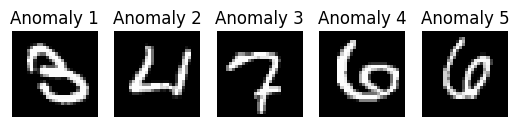

In [13]:
#display the some detected anomalies
n_anomalies_to_display = 5
for i in range(n_anomalies_to_display):
    plt.subplot(1, n_anomalies_to_display, i + 1)
    plt.imshow(anomalies[i].reshape(28, 28), cmap='gray')
    plt.title(f'Anomaly {i + 1}')
    plt.axis('off')
plt.show()